<a href="https://colab.research.google.com/github/JJJurarat/keras-tutrorial/blob/main/%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%9D%E0%B8%B6%E0%B8%81_keras_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Happy House!**🏠
---
> เริ่มต้นโหลด packages ที่จำเป็น เพื่อใช้ในการแก้ปัญหาของ Happy House!

In [5]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
# from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

 **หมายเหตุ**
```
อย่างที่เราเห็นกันว่า มีการนำเข้าของฟังก์ชันมากมายจาก keras เราสามารถใช้ง่าย ๆ โดยการเรียกมัน 
เช่น  X = Input(...) หรือ X = ZeroPadding2D(...)
```

### **Situation**

> **<font color=”purple”> The Happy House </font>**


* ในวันหยุดที่จะมาถึงในครั้งถัดไป คุณตัดสินใจที่จะใช้เวลาในวันหยุดนั้น กับเพื่อน 5 คน สถานที่นั้นก็คือ บ้านที่แสนสะดวกสบายพร้อมสิ่งอำนวยความสะดวกมากมาย แต่สิ่งที่สำคัญคือ ทุกคนที่จะเข้ามาในบ้านได้ ต้อง Happy! ดังนั้นใครอยากเข้าบ้านต้องพิสูจน์ Happiness ในปัจจุบัน ก่อนแล้วล่ะ

<img src = "https://datascience-enthusiast.com/figures/happy-house.jpg" width = "400 px" height = "300px">


###**Problem**
ในฐานะที่คุณเป็นผู้เชี่ยวชาญด้านการเรียนรู้เชิงลึก คุณคงต้องใช้กฎ "ความสุข" 🤗
---
> โดยคุณจะต้องสร้าง Algorithm ที่มี input เป็นรูปภาพจากกล้องหน้าประตู เพื่อตรวจสอบว่าคนที่จะเข้ามาใน Happy House นั้นมีความสุขหรือไม่ ประตูจะเปิดก็ต่อเมื่อคนในรุปภาพจากกล้องมีความสุขเท่านั้น !!! โดยตอนนี้คุณมีรูปภาพจากกล้องของเพื่อน ๆ ทั้ง 5 คน รวมถึงตัวคุณเอง ที่ถ่ายด้วยกล้องหน้าประตู ซึ่งมี label กำกับไว้แล้ว 
---

<img src = "https://datascience-enthusiast.com/figures/house-members.png" width = "650 px" height = "500px">

**เรียกใช้โค้ดต่อไปนี้เพื่อทำให้ชุดข้อมูลเป็นมาตรฐานและเรียนรู้เกี่ยวกับรูปร่างของชุดข้อมูล**

* File ที่ใช้สำหรับการฝีกและทดสอบข้อมูลชุดนี้ โดยต้องนำเข้าหรือเชื่อมต่อกับ Drive ก่อนแก้ปัญหา 
[Click here](https://drive.google.com/drive/folders/1orieYmKnKZ8HmhdpVHceu8mAWGjMxxmi?usp=sharing) 

> **<font color=”blue”> สามารถใช้วิธีการอื่นในการอ่านไฟล์ได้ </font>**

**1. นำเข้าไฟล์โดยการเชื่อมกับ Drive และอ่านไฟล์**
* test_happy.h5
* train_happy.h5

In [1]:
# เชื่อมต่ากับ Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#นำ path จาก drive ที่ให้ไว้มาใส่
path2 = "/content/drive/MyDrive/Colab Notebooks/test_happy.h5"  # path2 คือ test_happy.h5
path1 = "/content/drive/MyDrive/Colab Notebooks/train_happy.h5" # path1 คือ train_happy.h5

**2. ทำการ loading dataset จากทั้ง 2 ไฟล์ที่นำเข้ามา**

In [11]:
def load_dataset():
    train_dataset = h5py.File(path1, mode="r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # ฝึกจากชุดลักษณะ
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # ฝึกจากชุด labels
    
    test_dataset = h5py.File(path2, mode="r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # ทดสอบจากชุดลักษณะ
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # ทดสอบจากชุด labels
    
    classes = np.array(test_dataset["list_classes"][:]) # list of classes
    
    train_set_y_orig = train_set_y_orig.reshape(1, train_set_y_orig.shape[0])
    test_set_y_orig = test_set_y_orig.reshape(1, test_set_y_orig.shape[0])
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

รายละเอียดของชุดข้อมูล "Happy"
---
* Images are of shape (64,64,3)
* training : 600 ภาพ
* test : 150 รูป
ถึงเวลาแก้โจทย์ "Happiness" แล้ว
---

####**ใช้รูปแบบ function ตามโค้ดด้านล่าง** 
* สำหรับการฝึกและทดสอบ model ที่คุณจะสร้างขึ้นจากปัญหา Happy House

In [ ]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
        # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(64, (5,5), name='conv1')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    # DROPOUT
    X = Dropout(rate=(0.25))(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(512, activation='relu')(X)
    X = Dense(128, activation='relu')(X)
    X = Dropout((0.5))(X)
    
    
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model
    ### END CODE HERE ###
    
    return model

####Hint : step 2 compile the model
> **<font color=”red”> The Happy Challenge is a binary classification problem. </font>**


#⏲It is now time to solve the "Happy" Challenge.


#💹 เฉลย Solution

In [22]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

#number of training examples = 600
#number of test examples = 150
#X_train shape: (600, 64, 64, 3)
#Y_train shape: (600, 1)
#X_test shape: (150, 64, 64, 3)
#Y_test shape: (150, 1)

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


ลองแสดงผลรูปภาพของการเทรน จากตัวอย่างการเทรนที่ 599

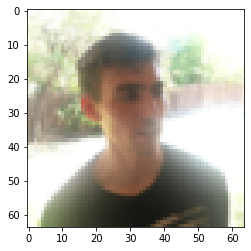

In [15]:
plt.imshow(X_train[599])

###Step 1: create the model.

You have now built a function to describe your model. To train and test this model, there are four steps in Keras:

In [26]:
happyModel = HappyModel(X_train.shape[1:])

### Step 2: compile the model to configure the learning process
กำหนดค่า โดยเรียก .compile()
* optimizers
* loss
* metrics

In [27]:
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

###Step 3: train the model. 
 กำหนดค่า โดยเรียก .fit()
 * epoch
 * batch size
 * validation split


In [28]:
happyModel.fit(X_train, Y_train, epochs=20, batch_size=50)

Epoch 1/20
12/12 [==============================] - 24s 2s/step - loss: 2.5071 - accuracy: 0.5300
Epoch 2/20
12/12 [==============================] - 22s 2s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/20
12/12 [==============================] - 22s 2s/step - loss: 0.6924 - accuracy: 0.5000
Epoch 4/20
12/12 [==============================] - 22s 2s/step - loss: 0.5781 - accuracy: 0.6967
Epoch 5/20
12/12 [==============================] - 22s 2s/step - loss: 0.3549 - accuracy: 0.8233
Epoch 6/20
12/12 [==============================] - 22s 2s/step - loss: 0.2376 - accuracy: 0.8967
Epoch 7/20
12/12 [==============================] - 22s 2s/step - loss: 0.1811 - accuracy: 0.9150
Epoch 8/20
12/12 [==============================] - 22s 2s/step - loss: 0.1416 - accuracy: 0.9400
Epoch 9/20
12/12 [==============================] - 22s 2s/step - loss: 0.1350 - accuracy: 0.9350
Epoch 10/20
12/12 [==============================] - 22s 2s/step - loss: 0.1238 - accuracy: 0.9517
Epoch 11/20
12/12 [

###Step 4: Evaluate the model
โดยการเรียก .evaluate

In [29]:
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 2s 267ms/step - loss: 0.1870 - accuracy: 0.9467

Loss = 0.18701305985450745
Test Accuracy = 0.9466666579246521


###Step 5: Predict
* เลือกรูปภาพที่อยาก predict นอกเหนือจากข้อมูล data set ที่ใช้ฝึกโมเดลชุดนี้

In [ ]:
img_path = 'my_image.jpg' 
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x ​= image.img_to_array(img)
x ​= np.expand_dims(x, axis=0)
x ​= preprocess_input(x)

print(happyModel.predict(x)

###End
Congratulations, you have solved the Happy House challenge!